In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('advertising.csv')

In [25]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
df.shape

(200, 4)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


As we can see that, This dataset doesn't have any categorical data

In [28]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


The standard deviation for TV advertising budget is (85.85), which is much higher than the standard deviation for radio (14.85) and newspaper (21.78). This indicates that there is a wider variation in TV advertising budgets than radio and newspaper advertising budgets.

#### Now we will perform Data cleaning

we will check for null values

In [29]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

As we can see we got lucky that there are no missing values in the dataset so we can move on with ***checking for outliers***

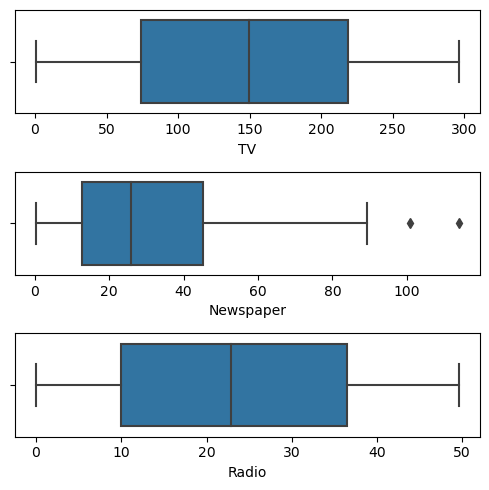

In [30]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

As we can see we got lucky again that there are no siginificant outlies so we can move on with ***Exploritary Data Analysis***

### EDA

First we will begin with the total amounts spent on each type of advertisement

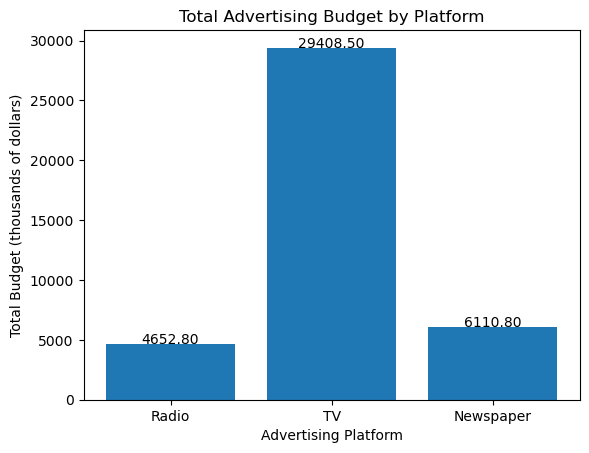

In [31]:
x = ['Radio', 'TV', 'Newspaper']
y = [df['Radio'].sum(), df['TV'].sum(), df['Newspaper'].sum()]

plt.bar(x, y)

for i, value in enumerate(y):
    plt.text(i, value + 0.5, "{:.2f}".format(value), ha="center")


plt.xlabel('Advertising Platform')
plt.ylabel('Total Budget (thousands of dollars)')
plt.title('Total Advertising Budget by Platform')

# Display the plot
plt.show()

We can see that the anual budget used for tv is way more than newspaper and radio

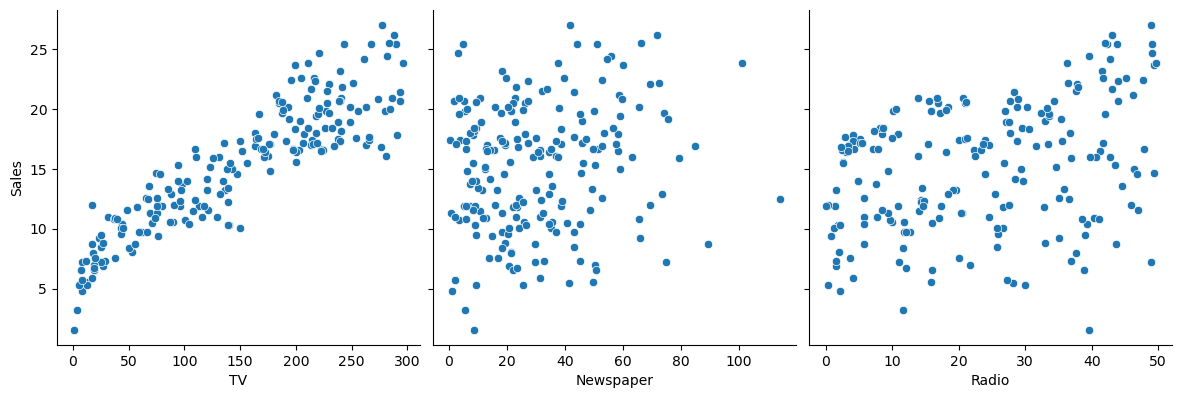

In [32]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

We can see that data points in radio is way more scttered than TV and NewsPaper 

Now we will check for the Correlation between the independent vs dependent features that is [TV,News paper,Radio] VS Sales

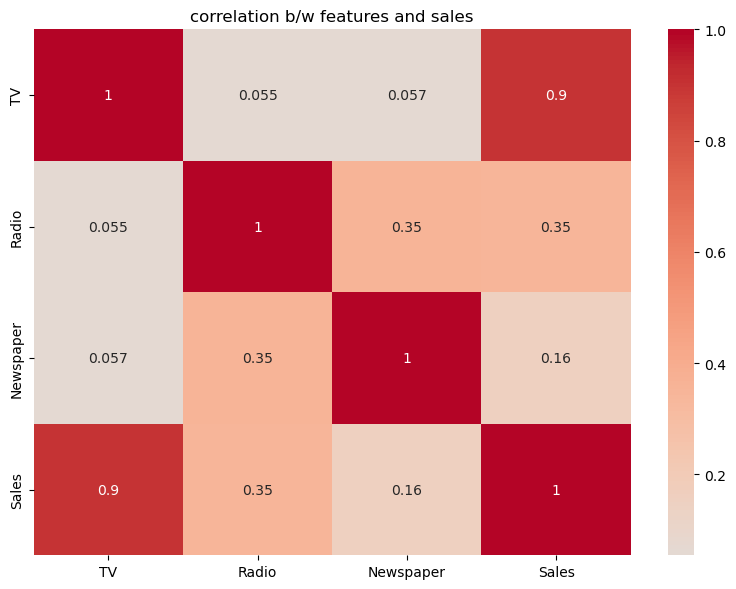

In [33]:
correlation_matrix=df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('correlation b/w features and sales')
plt.tight_layout()

### Obsevations
The heatmap shows that there is a strong positive correlation between TV advertising and sales. This means that as the amount of money spent on TV advertising increases, the sales tend to increase as well

There is also a moderate positive correlation between radio advertising and sales, but the correlation is not as strong as the correlation for TV advertising.

There is a weak positive correlation between newspaper advertising and sales. This means that as the amount of money spent on newspaper advertising increases, the sales tend to decrease slightly

So We are dropping the newspaper feature 

In [34]:
df.drop('Newspaper',axis=1,inplace=True)


In [35]:
df.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9


### Training the Model

In [40]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [43]:
y_pred=lin_reg.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [46]:
print(mse)
print(rmse)
print(r2)

2.6029121639579897
1.61335432064937
0.9074206515321912


Observations

1. The MSE is 2.602. This means that the average squared error between the predicted values and the actual values is 2.602.
2. The RMSE is 1.613. This means that the average error between the predicted values and the actual values is 1.613.
3. The R-squared is 0.9074. This means that 90.74% of the variance in the dependent variable is explained by the independent variables in the linear regression model.


***In general, a lower MSE, RMSE, and a higher R-squared value indicate a better performing model. So, the linear regression model that you trained is performing well***